TIP 59 - INTRODUCTION TO PANDAS
-------------------

Pandas is a package of fast, efficient data analysis tools for Python. It builds on the basics of NumPy and defines some fundamental structures for working with data and endows them with methods that form the first steps of data analysis. The most important data type defined by pandas is a ```DataFrame```, which is an object for storing related columns of data. Think of a ```DataFrame``` as analogous to a (highly optimized) Excel spreadsheet, or as a structure for storing the $X$ matrix in a linear regression.

The strengths of pandas lie in:

- reading in data

- manipulating rows and columns

- adjusting indices

- working with dates and time series

- sorting, grouping, re-ordering and general data munging

- dealing with missing values, etc., etc.

To begin import the following:

In [54]:
import pandas as pd
import numpy as np

TIP 60 - SERIES
---------------

You can think of a Series as a “column” of data, such as a collection of observations on a single variable.

As an example the indices $0, 1, 2, 3$ might be indexing four listed companies, and the values being daily returns on their shares.

In [24]:
s = pd.Series(np.random.randn(4), name='daily returns')
s

0    0.502333
1    0.146784
2    0.835674
3   -0.819420
Name: daily returns, dtype: float64

Pandas Series are built on top of NumPy arrays, and support many similar operations:

In [25]:
s * 100

0    50.233282
1    14.678449
2    83.567441
3   -81.942046
Name: daily returns, dtype: float64

In [26]:
np.abs(s)

0    0.502333
1    0.146784
2    0.835674
3    0.819420
Name: daily returns, dtype: float64

They have some additional (statistically oriented) methods such as

In [27]:
s.describe()

count    4.000000
mean     0.166343
std      0.714844
min     -0.819420
25%     -0.094767
50%      0.324559
75%      0.585668
max      0.835674
Name: daily returns, dtype: float64

And their indices are more flexible, and can behave like Python dictionaries.

In [28]:
s.index = ['AMZN', 'AAPL', 'MSFT', 'GOOG']
s

AMZN    0.502333
AAPL    0.146784
MSFT    0.835674
GOOG   -0.819420
Name: daily returns, dtype: float64

In [29]:
s['AMZN']

0.50233282415708347

In [30]:
s['AMZN'] = 0
s

AMZN    0.000000
AAPL    0.146784
MSFT    0.835674
GOOG   -0.819420
Name: daily returns, dtype: float64

In [31]:
'AAPL' in s

True

TIP 61 - DATAFRAME
--------------

DataFrame is somewhat like a spreadsheet, or a structure for storing the data matrix in a regression. While a Series is one individual column of data, a DataFrame is all the columns

Let’s look at an example, reading in data from the CSV file ```pandas/test_pwt.csv```.

In [32]:
ls

1. Quant Econ - Introduction.ipynb  5. Quant Econ - SciPy.ipynb
2. Quant Econ - OOP.ipynb           6. Quant Econ - Pandas.ipynb
3. Quant Econ - NumPy.ipynb         test_pwt.csv
4. Quant Econ - Matplotlib.ipynb    us_cities.txt


In [61]:
df = pd.read_csv('test_pwt.csv')
type(df)

pandas.core.frame.DataFrame

In [62]:
df

,country,country isocode,year,POP,XRAT,tcgdp,cc,cg
0,Argentina,ARG,2000,37335.653,0.999500,2.950722e+05,75.716805,5.578804
1,Australia,AUS,2000,19053.186,1.724830,5.418047e+05,67.759026,6.720098
2,India,IND,2000,1006300.297,44.941600,1.728144e+06,64.575551,14.072206
3,Israel,ISR,2000,6114.570,4.077330,1.292539e+05,64.436451,10.266688
4,Malawi,MWI,2000,11801.505,59.543808,5.026222e+03,74.707624,11.658954
5,South Africa,ZAF,2000,45064.098,6.939830,2.272424e+05,72.718710,5.726546
6,United States,USA,2000,282171.957,1.000000,9.898700e+06,72.347054,6.032454
7,Uruguay,URY,2000,3219.793,12.099592,2.525596e+04,78.978740,5.108068


We can select particular rows using standard Python array slicing notation:

In [63]:
df[2:5]

,country,country isocode,year,POP,XRAT,tcgdp,cc,cg
2,India,IND,2000,1006300.297,44.941600,1.728144e+06,64.575551,14.072206
3,Israel,ISR,2000,6114.570,4.077330,1.292539e+05,64.436451,10.266688
4,Malawi,MWI,2000,11801.505,59.543808,5.026222e+03,74.707624,11.658954


To select columns, we can pass a list containing the names of the desired columns represented as strings:

In [64]:
df[['country', 'tcgdp']]

,country,tcgdp
0,Argentina,2.950722e+05
1,Australia,5.418047e+05
2,India,1.728144e+06
3,Israel,1.292539e+05
4,Malawi,5.026222e+03
5,South Africa,2.272424e+05
6,United States,9.898700e+06
7,Uruguay,2.525596e+04


We can even do a mix of both with the ```ix``` attribute:

In [65]:
df.ix[2:5, ['country', 'tcgdp']]

,country,tcgdp
2,India,1.728144e+06
3,Israel,1.292539e+05
4,Malawi,5.026222e+03
5,South Africa,2.272424e+05


Let’s imagine that we’re only interested in population and total GDP (```tcgdp```)

One way to strip the data frame df down to only these variables is as follows:

In [66]:
keep = ['country', 'POP', 'tcgdp']

df = df[keep].copy()

df

,country,POP,tcgdp
0,Argentina,37335.653,2.950722e+05
1,Australia,19053.186,5.418047e+05
2,India,1006300.297,1.728144e+06
3,Israel,6114.570,1.292539e+05
4,Malawi,11801.505,5.026222e+03
5,South Africa,45064.098,2.272424e+05
6,United States,282171.957,9.898700e+06
7,Uruguay,3219.793,2.525596e+04


Here the index  $0, 1,\dots, 7$ is redundant, because we can use the country names as an index.

To do this, first let’s pull out the country column and replace index:

In [67]:
countries = df[['country']]
still = ['POP', 'tcgdp']
df = df[still].copy()
df.index = countries
df

,POP,tcgdp
"(Argentina,)",37335.653,2.950722e+05
"(Australia,)",19053.186,5.418047e+05
"(India,)",1006300.297,1.728144e+06
"(Israel,)",6114.570,1.292539e+05
"(Malawi,)",11801.505,5.026222e+03
"(South Africa,)",45064.098,2.272424e+05
"(United States,)",282171.957,9.898700e+06
"(Uruguay,)",3219.793,2.525596e+04


We can improve the naming of columns manually:

In [69]:
df.columns = 'population', 'total GDP'
df

,population,total GDP
"(Argentina,)",37335.653,2.950722e+05
"(Australia,)",19053.186,5.418047e+05
"(India,)",1006300.297,1.728144e+06
"(Israel,)",6114.570,1.292539e+05
"(Malawi,)",11801.505,5.026222e+03
"(South Africa,)",45064.098,2.272424e+05
"(United States,)",282171.957,9.898700e+06
"(Uruguay,)",3219.793,2.525596e+04


Population is in thousands, let’s revert to single units:

In [70]:
df['population'] = df['population'] * 1e3
df

,population,total GDP
"(Argentina,)",3.733565e+07,2.950722e+05
"(Australia,)",1.905319e+07,5.418047e+05
"(India,)",1.006300e+09,1.728144e+06
"(Israel,)",6.114570e+06,1.292539e+05
"(Malawi,)",1.180150e+07,5.026222e+03
"(South Africa,)",4.506410e+07,2.272424e+05
"(United States,)",2.821720e+08,9.898700e+06
"(Uruguay,)",3.219793e+06,2.525596e+04


Next we’re going to add a column showing real GDP per capita, multiplying by 1,000,000 as we go because total GDP is in millions.

In [71]:
df['GDP percap'] = df['total GDP'] * 1e6 / df['population']
df

,population,total GDP,GDP percap
"(Argentina,)",3.733565e+07,2.950722e+05,7903.229085
"(Australia,)",1.905319e+07,5.418047e+05,28436.433261
"(India,)",1.006300e+09,1.728144e+06,1717.324719
"(Israel,)",6.114570e+06,1.292539e+05,21138.672749
"(Malawi,)",1.180150e+07,5.026222e+03,425.896679
"(South Africa,)",4.506410e+07,2.272424e+05,5042.647686
"(United States,)",2.821720e+08,9.898700e+06,35080.381854
"(Uruguay,)",3.219793e+06,2.525596e+04,7843.970620


One of the nice things about pandas DataFrame and Series objects is that they have methods for plotting and visualization that work through ```Matplotlib```.

For example, we can easily generate a bar plot of GDP per capita

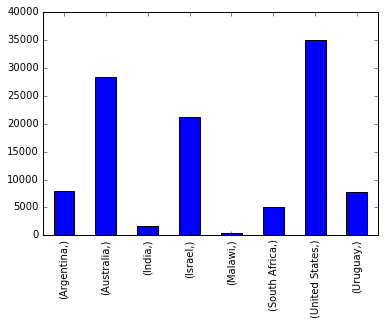

In [74]:
df['GDP percap'].plot(kind='bar')

At the moment the data frame is ordered alphabetically on the countries—let’s change it to GDP per capita.

In [75]:
df = df.sort_values(by='GDP percap', ascending=False)

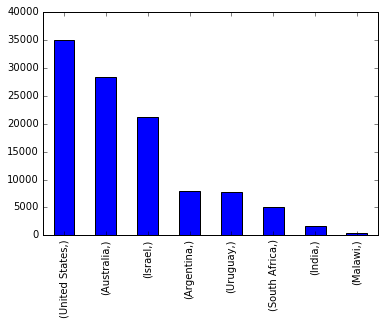

In [76]:
df['GDP percap'].plot(kind='bar')

TIP 62 - ONLINE DATA SOURCES
----------

```pandas``` makes it straightforward to query several common Internet databases programmaticall.y

One particularly important one is FRED — a vast collection of time series data maintained by the St. Louis Fed.

For example, suppose that we are interested in the unemployment rate, then working via FRED, the entire series for the US civilian rate can be downloaded directly by entering this URL into your browser.

https://research.stlouisfed.org/fred2/series/UNRATE/downloaddata/UNRATE.csv

This request returns a CSV file, which will be handled by your default application for this class of files.

Alternatively, we can access the CSV file from within a Python program.

TIP 63 - ACCESSING DATA 1
--------------

One option is to use ```urlopen```, a standard Python library for requesting data over the Internet.

In [81]:
from urllib2 import urlopen
source = urlopen('http://research.stlouisfed.org/fred2/series/UNRATE/downloaddata/UNRATE.csv')

In [82]:
data = pd.read_csv(source, index_col=0, parse_dates=True, header=None)

The data has been read into a pandas DataFrame called data that we can now manipulate in the usual way.

In [83]:
type(data)

pandas.core.frame.DataFrame

In [84]:
data.head()  # A useful method to get a quick look at a data frame

,1
0,
DATE,VALUE
1948-01-01,3.4
1948-02-01,3.8
1948-03-01,4.0
1948-04-01,3.9


In [85]:
data.describe()  # Your output might differ slightly

,1
count,823
unique,81
top,5.7
freq,33


TIP 64 - ACCESSING DATA 2
-------------

Although it is worth understanding the low level procedures, for the present case pandas can take care of all these messy details by puttinh a simple API (Application Progamming Interface) on top of the kind of low level function calls we’ve just covered.

[Install ```pandas_datareader``` package using conda: ```conda install pandas-datareader```]

For example, we can obtain the same unemployment data for the period 2006–2012 inclusive as follows:

In [86]:
from pandas_datareader import data,wb
import datetime as dt  # Standard Python date / time library
start, end = dt.datetime(2006, 1, 1), dt.datetime(2012, 12, 31)
data = data.DataReader('UNRATE', 'fred', start, end)
type(data)

pandas.core.frame.DataFrame

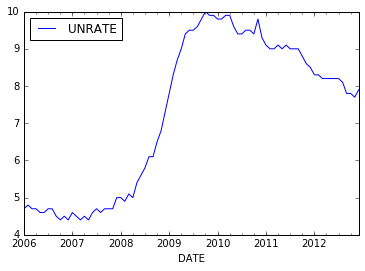

In [87]:
data.plot()

TIP 65 - WORLD BANK
-------------

Let’s look at one more example of downloading and manipulating data — this time from the World Bank. The World Bank collects and organizes data on a huge range of indicators.

For example, here we find data on government debt as a ratio to GDP: http://data.worldbank.org/indicator/GC.DOD.TOTL.GD.ZS/countries

If you click on “DOWNLOAD DATA” you will be given the option to download the data as an Excel file.

The next program does this for you, parses the data from Excel file to pandas DataFrame, and plots time series for France, Germany, the US and Australia.

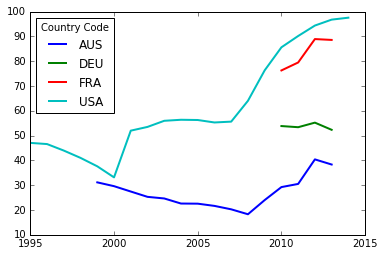

In [88]:
import sys
import matplotlib.pyplot as plt
from pandas.io.excel import ExcelFile

if sys.version_info[0] == 2:
    from urllib import urlretrieve
elif sys.version_info[0] == 3:
    from urllib.request import urlretrieve

# == Get data and read into file gd.xls == #
wb_data_query = "http://api.worldbank.org/v2/en/indicator/gc.dod.totl.gd.zs?downloadformat=excel"
urlretrieve(wb_data_query, "gd.xls")

# == Parse data into a DataFrame == #
gov_debt_xls = ExcelFile('gd.xls')
govt_debt = gov_debt_xls.parse('Data', index_col=1, na_values=['NA'], skiprows=3)

# == Take desired values and plot == #
govt_debt = govt_debt.transpose()
govt_debt = govt_debt[['AUS', 'DEU', 'FRA', 'USA']]
govt_debt = govt_debt[38:]
govt_debt.plot(lw=2)
plt.show()